In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import csv
from sklearn.metrics import roc_auc_score
from datetime import datetime
import sys
import os


In [2]:
tier = 'IRON'
df = pd.read_csv(f'../Dataset/preProcessed/{tier}.csv')

In [3]:

data = df[['Diff_FirstBLOOD','Diff_FirstDRAGON','Diff_Kill','Diff_Asisst','Diff_LV','Diff_CS','Diff_Death','Diff_WARDplaced','Diff_WARDkill','Diff_controlWARDPlaced','Diff_jglCS','FirstDragon_AIR_DRAGON','FirstDragon_EARTH_DRAGON','FirstDragon_FIRE_DRAGON','FirstDragon_WATER_DRAGON','FirstDragon_HEXTECH_DRAGON','FirstDragon_CHEMTECH_DRAGON', 'result']]



In [4]:
display(data)


,Diff_FirstBLOOD,Diff_FirstDRAGON,Diff_Kill,Diff_Asisst,Diff_LV,Diff_CS,Diff_Death,Diff_WARDplaced,Diff_WARDkill,Diff_controlWARDPlaced,Diff_jglCS,FirstDragon_AIR_DRAGON,FirstDragon_EARTH_DRAGON,FirstDragon_FIRE_DRAGON,FirstDragon_WATER_DRAGON,FirstDragon_HEXTECH_DRAGON,FirstDragon_CHEMTECH_DRAGON,result
0,-1,0,0.0,-17.0,1.0,-17.0,0.0,-1.0,1.0,1.0,4.0,0,0,0,0,0,0,1
1,-1,-1,2.0,11.0,-1.0,-8.0,-2.0,-6.0,1.0,-1.0,0.0,0,0,0,0,0,0,1
2,1,1,-4.0,-20.0,0.0,45.0,5.0,11.0,0.0,1.0,12.0,0,0,0,0,1,0,1
3,-1,0,-2.0,-12.0,-1.0,19.0,2.0,3.0,-1.0,0.0,-16.0,0,0,0,0,0,0,1
4,-1,0,-3.0,-5.0,-1.0,-9.0,3.0,-4.0,0.0,-1.0,10.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,-1,0,2.0,33.0,0.0,56.0,-2.0,-1.0,0.0,-1.0,-20.0,0,0,0,0,0,0,0
9036,1,-1,-4.0,-6.0,-2.0,-28.0,4.0,-7.0,3.0,-1.0,-23.0,0,0,0,0,0,0,0
9037,1,-1,2.0,-1.0,0.0,48.0,-2.0,2.0,0.0,2.0,4.0,0,0,0,0,0,0,0
9038,1,0,1.0,14.0,-1.0,-49.0,-1.0,-6.0,0.0,-2.0,8.0,0,0,0,0,0,0,0


In [5]:
colCnt = data.shape[1]
print(colCnt)
X = data[data.columns.difference(['result'])]
y = data['result']

18


##### 일정 기준 이상의 상관계수 column 추출

##### 히트맵 그리기

##### Kfold

In [6]:
    # 랜덤 포레스트
rf = RandomForestClassifier(max_features='sqrt', max_leaf_nodes=200, random_state=10)
    # 라이트지비엠
lgbm = LGBMClassifier(n_estimators=50, max_depth=12, num_leaves=25, verbosity=0, min_child_samples=30, random_state=10)
    # 캣부스트
cat = CatBoostClassifier(iterations=200, depth=7, learning_rate=0.1, l2_leaf_reg=40, verbose=0, random_state=10)
    # 엑스트라트리
et = ExtraTreesClassifier(max_depth=7, max_features=None, random_state=10)

In [7]:

modelList = [rf, lgbm, cat, et]
# modelList = [knn, svc, nusvc, dct]
modelNameList = ["RandomForest", "LightGBM", "CatBoost", "ExtraTree"]
# modelNameList = ["KNN", "SVC", "NuSVC", "DecisionTree"]
fieldnames = ["Model", "accuracy_score", "F1_score", "TN", "FP", "FN", "TP"]
for i in range(4):
    model = modelList[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10) # 학습데이터와 평가데이터의 비율을 8:2 로 분할|
    y_train = y_train.values.ravel()
    model.fit(X_train, y_train)
    pre_test = model.predict(X_test)
    pre_train = model.predict(X_train)
    tn, fp, fn, tp = confusion_matrix(y_test, pre_test).ravel()
    if model == cat:
        printModel = f"CatBoost{model.get_params()}"
    else:
        printModel = model
    print(f"{modelNameList[i]} Train Accuracy : ", round(accuracy_score(y_train, pre_train)*100, 2), "%")
    print(f"{modelNameList[i]} Test Accuracy : ", round(accuracy_score(y_test, pre_test)*100, 2), "%")
    print(f"{modelNameList[i]} F1_score :", round(f1_score(y_test, pre_test)*100, 2), "%")
    print(f"{modelNameList[i]} ROC_AUC :", round(roc_auc_score(y_test, pre_test)*100, 2), "%")
    print('tn:', tn, ' fp:', fp, ' fn:', fn, ' tp:', tp)

    # 과적합 확인
    # scores = cross_val_score(model, X, y, cv=3)
    # print("교차 검증 평균 정확도:", scores.mean())

    # 결과 csv로 저장
    fieldnames = ["Tier", "Min","TIME", "Model", "Train_Accuracy", "Test_Accuracy", "F1_score", "ROC_AUC", "TN", "FP", "FN", "TP", "Note"]
    result = {"Tier": tier,
              "Min": min,
              "TIME": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
              "Model": printModel, 
              "Train_Accuracy" : round(accuracy_score(y_train, pre_train)*100, 2),
              "Test_Accuracy" : round(accuracy_score(y_test, pre_test)*100, 2), 
              "F1_score" : round(f1_score(y_test, pre_test)*100, 2),
              "ROC_AUC" : round(roc_auc_score(y_test, pre_test)*100, 2),
              "TN": tn,
              "FP": fp,
              "FN": fn,
              "TP": tp,
              "Note": 'solve ExtraTrees overfittng'}
    with open(f'../Dataset/perMinuteDataset/result/currentAccuracy/{tier}.csv', 'a', newline='') as f:
        w = csv.DictWriter(f, fieldnames=fieldnames)
        if i == 0:
            w.writeheader()
        w.writerow(result)

RandomForest Train Accuracy :  81.72 %
RandomForest Test Accuracy :  71.9 %
RandomForest F1_score : 72.51 %
RandomForest ROC_AUC : 71.89 %
tn: 630  fp: 250  fn: 258  tp: 670
LightGBM Train Accuracy :  77.27 %
LightGBM Test Accuracy :  71.57 %
LightGBM F1_score : 72.07 %
LightGBM ROC_AUC : 71.57 %
tn: 631  fp: 249  fn: 265  tp: 663
CatBoost Train Accuracy :  77.81 %
CatBoost Test Accuracy :  71.4 %
CatBoost F1_score : 72.4 %
CatBoost ROC_AUC : 71.36 %
tn: 613  fp: 267  fn: 250  tp: 678
ExtraTree Train Accuracy :  74.88 %
ExtraTree Test Accuracy :  71.24 %
ExtraTree F1_score : 71.83 %
ExtraTree ROC_AUC : 71.23 %
tn: 625  fp: 255  fn: 265  tp: 663


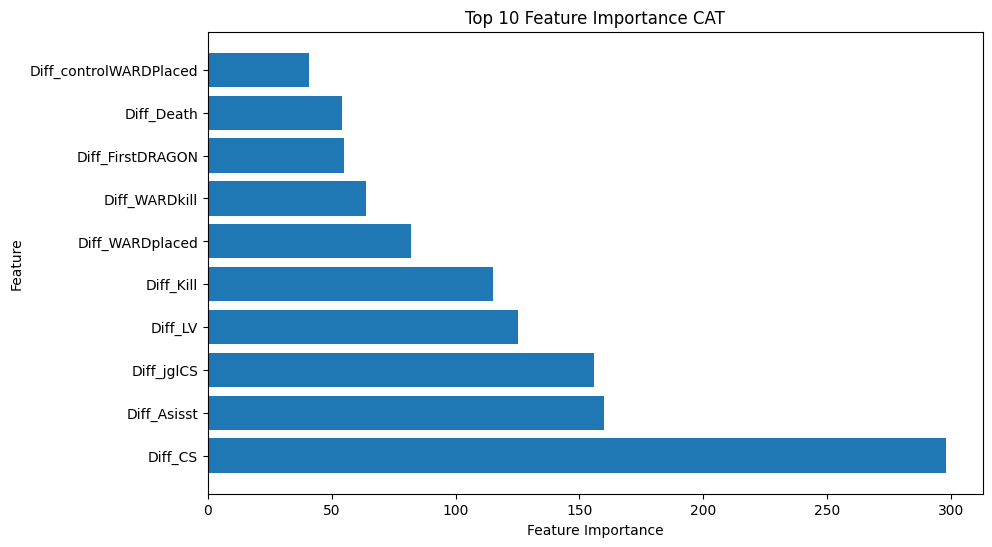

In [8]:
importance = lgbm.feature_importances_
feature_names = X.columns
feature_importance = list(zip(feature_names, importance))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# 중요도가 높은 상위 n개의 특성 선택
top_n = 10
top_features = feature_importance[:top_n]

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), [importance for _, importance in top_features], align='center')
plt.yticks(range(top_n), [feature for feature, _ in top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importance CAT')
plt.show()

##### GridSearch